First, we import the necessary libraries

In [1]:
import sys
import os
src_path = os.path.abspath(os.path.join(os.getcwd(), '../src'))
sys.path.append(src_path)
from messy_nd import *

We generate samples of a bi-modal distribution as the target density that we would like to infer it from its samples.

sample.shape =  (5000, 2)


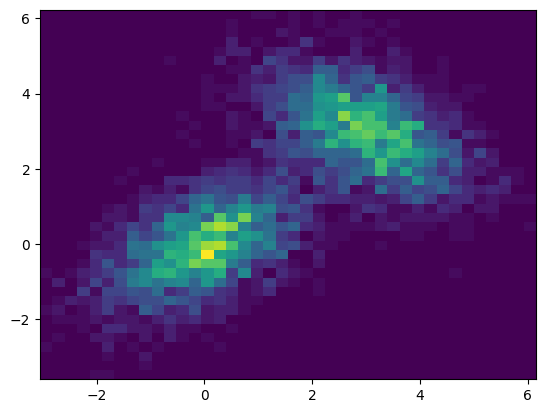

In [10]:
from scipy.stats import multivariate_normal

N = 5000 # number of samples
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]
samples1 = np.random.multivariate_normal(mean1, cov1, int(N/2))

mean2 = [3, 3]
cov2 = [[1, -0.5], [-0.5, 1]]
samples2 = np.random.multivariate_normal(mean2, cov2, N-int(N/2))

# Combine the two sets of samples to make bi-modal distr.
samples = np.vstack([samples1, samples2])

print("sample.shape = ", samples.shape)
_ = plt.hist2d(samples[:,0],samples[:,1],bins=40)

In [11]:
dim = samples.shape[1]
poly_order = 2
x = sp.symbols('x:' + str(dim), real=True)
x_order = 4
n_bases = 2
tree_depth = 2
constant_range=(1,3)
def cos_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)

def sin_(x):
  integer = random.randint(*constant_range)
  half = integer + random.choice([0, 0.5])
  return sp.cos(sp.Rational(half)*x)

pow = [lambda x, i=i: x**i for i in range(1, poly_order+1)]
binary_operators = [sp.Mul]
unary_functions = [cos_, sin_] + pow

messy = MESSY_nd(dim=dim, x_order=x_order, n_bases=n_bases, poly_order=poly_order, tree_depth=tree_depth, binary_operators = binary_operators, unary_functions = unary_functions)


N_iters = 5
dic, best_iter = messy.get_pdf(samples, N_iters=N_iters, verbose=True)

Found MESSY-P:
0.0658078251601109*exp(-0.294661165542919*x0**2 + 0.404230744702277*x0*x1 + 0.278516098514897*x0 - 0.289567783428164*x1**2 + 0.260455373788551*x1)*exp(-0.0111388836351693*x0**4 - 0.0167088599066365*x0**3*x1 + 0.130291534119701*x0**3 - 0.0237214388429876*x0**2*x1**2 + 0.0771643790757961*x0**2*x1 - 0.219597818739947*x0**2 - 0.0150572612694451*x0*x1**3 + 0.0468280541841745*x0*x1**2 + 0.42327584197981*x0*x1 - 0.692500392760646*x0 - 0.00823582809794702*x1**4 + 0.111565725537696*x1**3 - 0.187136322780251*x1**2 - 0.607877571202463*x1)



Found MESSY-S:
0.0651607784130809*exp(-0.0800285476113233*x0*x1*cos(x0) + 0.00510532267138396*x1**2*cos(5*x0/2)*cos(3*x0)*cos(7*x0/2))*exp(-0.00581415439510446*x0**4 - 0.00743274373933142*x0**3*x1 + 0.108588211626226*x0**3 - 0.0251600270531786*x0**2*x1**2 + 0.0237623201958327*x0**2*x1 - 0.553045924238821*x0**2 - 0.020104235982014*x0*x1**3 + 0.0748221324786611*x0*x1**2 + 0.843053488653986*x0*x1 - 0.320180729387608*x0 - 0.00835494251309468*x1**4 

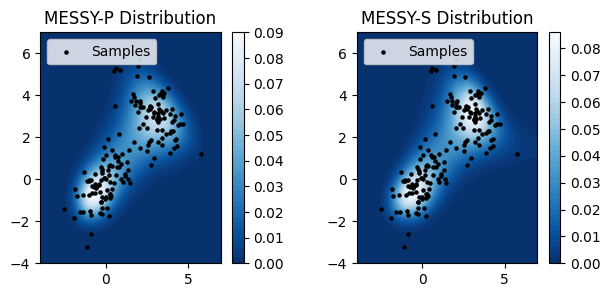

In [14]:
xx = np.linspace(-2.5, 2.5, 1000)

print("Found MESSY-P:")
print( dic[0][1] )
print("\n\n")

print("Found MESSY-S:")
print( dic[best_iter][1] )
print("\n\n")

from matplotlib.colors import Normalize
X, Y = np.meshgrid(np.linspace(-4, 7, 100), np.linspace(-4, 7, 100))
XY = np.array([X.ravel(), Y.ravel()]).T
Z_MESSY_P = np.apply_along_axis(lambda args: dic[0][0](*args), 1, XY).reshape(X.shape)
Z_MESSY_S = np.apply_along_axis(lambda args: dic[best_iter][0](*args), 1, XY).reshape(X.shape)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))
c = ax1.contourf(X, Y, Z_MESSY_P, levels=50, cmap="Blues_r", alpha=1)
fig.colorbar(c, ax=ax1, norm=Normalize(vmin=0, vmax=np.max(Z_MESSY_P)))
ax1.scatter(samples[::30, 0], samples[::30, 1], c='black', s=5, label="Samples")
ax1.set_title("MESSY-P Distribution")
ax1.legend(loc='upper left')

c = ax2.contourf(X, Y, Z_MESSY_S, levels=50, cmap="Blues_r", alpha=1)
fig.colorbar(c, ax=ax2, norm=Normalize(vmin=0, vmax=np.max(Z_MESSY_S)))
ax2.scatter(samples[::30, 0], samples[::30, 1], c='black', s=5, label="Samples")
ax2.set_title("MESSY-S Distribution")
ax2.legend(loc='upper left')

fig.subplots_adjust(wspace=0.4)
plt.show()